In [26]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# rate be like number of samples per second. int value
# data will contain an array of amplitude values. It will be 1D array if audio is Monochannel
# for a stereo channel it will have 2 rows. one row for left and athor for right channel
rate, data = wavfile.read('water.wav')

#My audio is stereo. shape of data is 2D. convert it to mono
mono_audio = np.mean(data, axis=1).astype(data.dtype)
normalised_mono_audio = mono_audio/ np.max(np.abs(mono_audio))

time = np.arange(len(normalised_mono_audio))/rate

Text(0, 0.5, 'Amplitude')

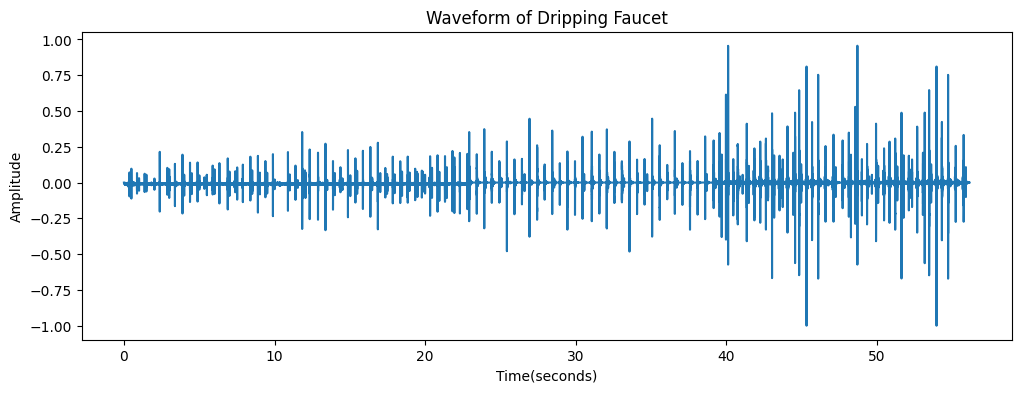

In [28]:
plt.figure(figsize=(12,4))
plt.plot(time,normalised_mono_audio)
plt.title('Waveform of Dripping Faucet')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

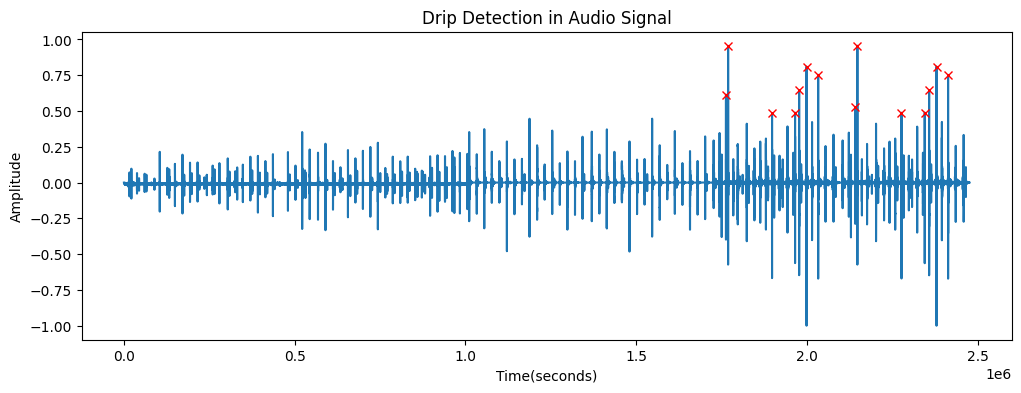

In [29]:
from scipy.signal import find_peaks

# Threshold Height
h = 0.5*max(normalised_mono_audio)

peaks,_ = find_peaks(normalised_mono_audio, height=h, distance=500)
plt.figure(figsize=(12,4))
plt.plot(normalised_mono_audio)
plt.plot(peaks, normalised_mono_audio[peaks],"x", color="r")
plt.title('Drip Detection in Audio Signal')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')

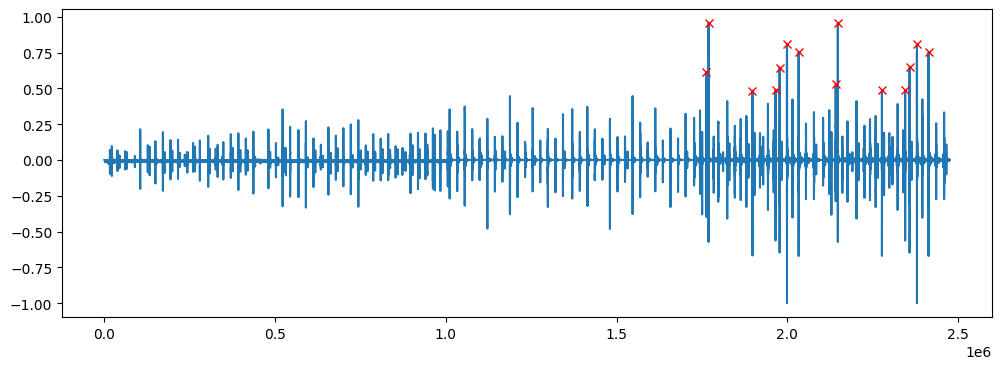

In [41]:
from scipy.signal import find_peaks

# Threshold
h=0.5*max(normalised_mono_audio)

peaks,_ = find_peaks(normalised_mono_audio, height=h, distance=1000)

plt.figure(figsize=(12,4))
plt.plot(normalised_mono_audio)
plt.plot(peaks, normalised_mono_audio[peaks], "x", color="r")

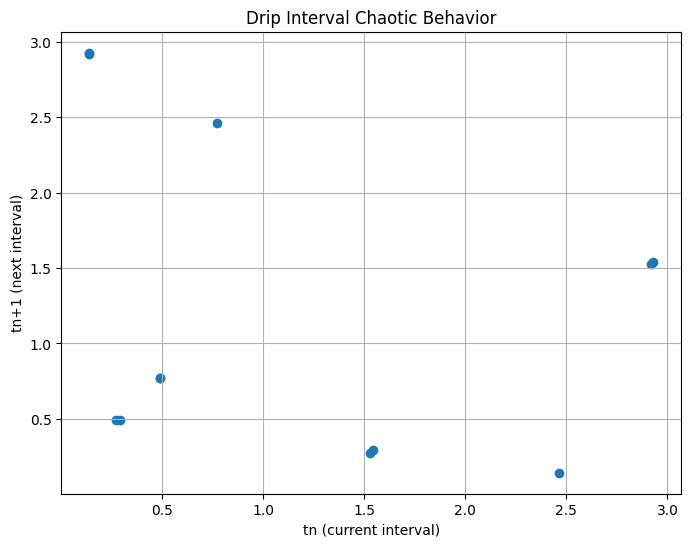

In [42]:
drip_times = peaks/rate
drip_intervals = np.diff(drip_times)

# Plot tn vs. tn+1 to visualize potential chaotic behavior
plt.figure(figsize=(8, 6))
plt.scatter(drip_intervals[:-1], drip_intervals[1:])
plt.title("Drip Interval Chaotic Behavior")
plt.xlabel("tn (current interval)")
plt.ylabel("tn+1 (next interval)")
plt.grid()

The code is plotting the relationship between consecutive time intervals between drips (tn vs. tn+1), which allows you to visualize how the interval between drips changes over time.
If the system is chaotic, you may see an irregular or non-linear pattern in the scatter plot, suggesting that the intervals between consecutive drips do not follow a simple pattern.